<a href="https://colab.research.google.com/github/HenryLiangzy/COMP9417_Project/blob/master/Henry_s_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Henry's Work
Using the Decision tree to train the data
while using the three Bag of word model
* Count Vectorizer
* TF-IDF Vectorizer
* Hashing Vectorizer

In [2]:
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [3]:
np.random.seed(1)
TRAINING_FILE = "training.csv"
TEST_FILE = "test.csv"

topic_code = {
    'ARTS CULTURE ENTERTAINMENT': 1,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
    'DEFENCE': 3,
    'DOMESTIC MARKETS': 4,
    'FOREX MARKETS': 5,
    'HEALTH': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10,
    'IRRELEVANT': 0
}

In [4]:
def preprocess(df):
    df['topic_code'] = df['topic'].apply(lambda x: topic_code[x])

    return df[['article_words', 'topic_code']]

def bag_of_word(train_set, test_set, model):
    vector = model
    train_x = vector.fit_transform(train_set['article_words'].values)
    train_y = train_set['topic_code']
    test_x = vector.transform(test_set['article_words'].values)
    test_y = test_set['topic_code']

    return train_x, train_y, test_x, test_y

In [5]:
# load data from file
df = pd.read_csv(TRAINING_FILE)

# pre process the y
df = preprocess(df)

# split the data
train_set, test_set = train_test_split(df, test_size=0.1)

# print(train_set)
train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, CountVectorizer())

print(train_x.shape)
print(train_y.shape[0])
print(test_x.shape)
print(test_y.shape[0])

(8550, 33913)
8550
(950, 33913)
950


In [6]:
%%time

# train
test_record = []
trianing_record = []

dtc = DecisionTreeClassifier(min_samples_leaf=2)
dtc.fit(train_x, train_y)

print("The accuracy of Training set is:", dtc.score(train_x, train_y))
print("The accuracy of Test set is:", dtc.score(test_x, test_y))

The accuracy of Training set is: 0.9385964912280702
The accuracy of Test set is: 0.6968421052631579
CPU times: user 3.89 s, sys: 21.4 ms, total: 3.91 s
Wall time: 3.92 s


In [7]:
predict_proba = dtc.predict_proba(test_x)
auc = roc_auc_score(test_y, predict_proba, multi_class='ovr')
print("Current auc is:", auc)

Current auc is: 0.7691544315909066


fiting with leaf value = 20 ......Done!
fiting with leaf value = 21 ......Done!
fiting with leaf value = 22 ......Done!
fiting with leaf value = 23 ......Done!
fiting with leaf value = 24 ......Done!
fiting with leaf value = 25 ......Done!
fiting with leaf value = 26 ......Done!
fiting with leaf value = 27 ......Done!
fiting with leaf value = 28 ......Done!
fiting with leaf value = 29 ......Done!
fiting with leaf value = 30 ......Done!
fiting with leaf value = 31 ......Done!
fiting with leaf value = 32 ......Done!
fiting with leaf value = 33 ......Done!
fiting with leaf value = 34 ......Done!
fiting with leaf value = 35 ......Done!
fiting with leaf value = 36 ......Done!
fiting with leaf value = 37 ......Done!
fiting with leaf value = 38 ......Done!
fiting with leaf value = 39 ......Done!
fiting with leaf value = 40 ......Done!
The optimal number of min_samples_leaf by TEST set is: 29
With max AUC by TEST is: 0.9063385700742814
The accuracy of BEST model in Training set is: 0.752046783

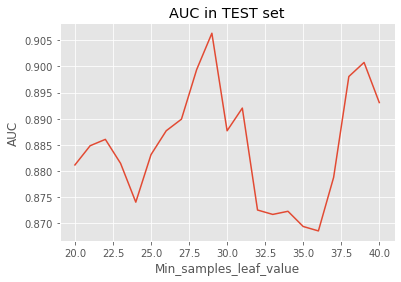

In [9]:
test_record = []
best_model = None

min_samples_leaf_value = 0
max_auc = 0
leaf_value_range = range(20, 41)
for leaf_value in leaf_value_range:
    print("fiting with leaf value = {} ...... ".format(leaf_value), end="")
    model = DecisionTreeClassifier(min_samples_leaf=leaf_value)
    model.fit(train_x, train_y)
    
    print("Done!")

    prediction = model.predict_proba(test_x)
    auc = roc_auc_score(test_y, prediction, multi_class='ovr')
    test_record.append(auc)

    if auc > max_auc:
        max_auc = auc
        min_samples_leaf_value = leaf_value
        best_model = model

print("The optimal number of min_samples_leaf by TEST set is:", min_samples_leaf_value)
print("With max AUC by TEST is:", max_auc)
print("The accuracy of BEST model in Training set is:", best_model.score(train_x, train_y))
print("The accuracy of BEST model in Test set is:", best_model.score(test_x, test_y))


plt.style.use('ggplot')
# fig = plt.figure(figsize=(12, 6))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(leaf_value_range, test_record)
ax1.set_title('AUC in TEST set')
ax1.set_xlabel('Min_samples_leaf_value')
ax1.set_ylabel('AUC')

plt.show()